In [1]:
import gzip
from collections import defaultdict
from sklearn import linear_model
import csv
import random
import numpy as np

def readGz(path):
    for l in gzip.open(path, 'r'):
        yield eval(l)

def readCSV(path):
    f = gzip.open(path, 'rt')
    c = csv.reader(f)
    header = next(c)
    for l in c:
        d = dict(zip(header,l))
        yield d['user_id'],d['recipe_id'],d


In [2]:
user_reviews = []
for d in readGz("./data/australian_user_reviews.json.gz"):
    user_reviews.append(d)

In [3]:
print(len(user_reviews))
print(user_reviews[1])

25799
{'user_id': 'js41637', 'user_url': 'http://steamcommunity.com/id/js41637', 'reviews': [{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 people (75%) found this review helpful', 'recommend': True, 'review': 'I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it\'s title, this is easily one of my GOTYs. You don\'t get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can\'t 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'}, {'funny': '', 'posted': 'Posted September 8, 2013.', 'last_edited': '', 'item_id': '227300', 'helpful': '0 of 1 people (0%) found this review helpful', '

In [4]:
users_items = []
for d in readGz("./data/australian_users_items.json.gz"):
    users_items.append(d)

In [5]:
print(len(users_items))
print(users_items[10000])
print()
print(users_items[0])

88310
{'user_id': '76561198075715730', 'items_count': 0, 'steam_id': '76561198075715730', 'user_url': 'http://steamcommunity.com/profiles/76561198075715730', 'items': []}

{'user_id': '76561197970982479', 'items_count': 277, 'steam_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2w

In [6]:
bundle_data = []
for d in readGz("./data/bundle_data.json.gz"):
    bundle_data.append(d)

In [7]:
print(len(bundle_data))
print(bundle_data[0])

615
{'bundle_final_price': '$66.46', 'bundle_url': 'http://store.steampowered.com/bundle/450/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page', 'bundle_price': '$73.86', 'bundle_name': 'Dharker Studio 2015 Complete', 'bundle_id': '450', 'items': [{'genre': 'Adventure, Indie, RPG', 'item_id': '326950', 'discounted_price': '$8.99', 'item_url': 'http://store.steampowered.com/app/326950', 'item_name': 'Sword of Asumi'}, {'genre': 'Adventure, Indie, RPG', 'item_id': '331490', 'discounted_price': '$2.99', 'item_url': 'http://store.steampowered.com/app/331490', 'item_name': 'Sword of Asumi - Soundtrack'}, {'genre': 'Adventure, Indie, RPG', 'item_id': '331491', 'discounted_price': '$1.99', 'item_url': 'http://store.steampowered.com/app/331491', 'item_name': 'Sword of Asumi - Graphic Novel'}, {'genre': 'Adventure, Indie, RPG', 'item_id': '331492', 'discounted_price': '$0.99', 'item_url': 'http://store.steampowered.com/app/331492', 'item_name': 'Sword of Asumi - Chara

In [8]:
steam_games = []
for d in readGz("./data/steam_games.json.gz"):
    steam_games.append(d)

In [9]:
print(len(steam_games))
print(steam_games[0])

32135
{'publisher': 'Kotoshiro', 'genres': ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'], 'app_name': 'Lost Summoner Kitty', 'title': 'Lost Summoner Kitty', 'url': 'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/', 'release_date': '2018-01-04', 'tags': ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'], 'discount_price': 4.49, 'reviews_url': 'http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1', 'specs': ['Single-player'], 'price': 4.99, 'early_access': False, 'id': '761140', 'developer': 'Kotoshiro'}


### EDA

In [10]:
num_of_games = []
for d in users_items:
    num_of_games.append(d['items_count'])
print(sum(num_of_games)/len(num_of_games))

58.353629260559394


In [11]:
import matplotlib.pyplot as plt

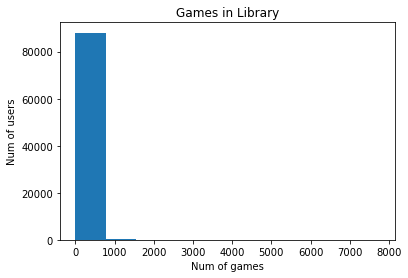

In [12]:
plt.hist(num_of_games)
plt.title("Games in Library")
plt.xlabel("Num of games")
plt.ylabel("Num of users")
plt.show()


As we can see, there are outliers in the graph, lets remove them and plot.

In [13]:
num_of_games_modified = []
for i in num_of_games:
    if i < 1000:
        num_of_games_modified.append(i)
print(sum(num_of_games_modified)/len(num_of_games_modified))

55.37835875914479


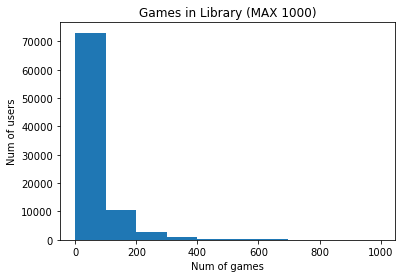

In [14]:
plt.hist(num_of_games_modified)
plt.title("Games in Library (MAX 1000)")
plt.xlabel("Num of games")
plt.ylabel("Num of users")
plt.show()

As we can see, it is highly skewed, and I want to look at the lower end.

In [15]:
num_of_games_modified_2 = []
for i in num_of_games_modified:
    if i < 200:
        num_of_games_modified_2.append(i)
print(sum(num_of_games_modified_2)/len(num_of_games_modified_2))

39.920967471294674


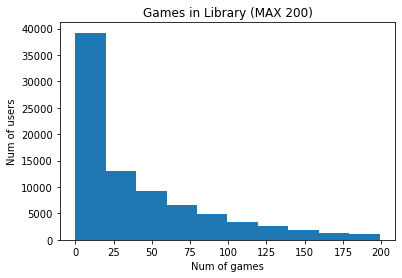

In [16]:
plt.hist(num_of_games_modified_2)
plt.title("Games in Library (MAX 200)")
plt.xlabel("Num of games")
plt.ylabel("Num of users")
plt.show()

Very very skewed.

In [17]:
print(sum([i==0 for i in num_of_games]))

16806


Take a look at games in the dataset

In [18]:
t = 0
for i in steam_games:
    if "price" in i.keys():
        if i['price']==0:
            t+=1
    else:
        print(i)

{'publisher': 'RewindApp', 'genres': ['Casual', 'Indie', 'Racing', 'Simulation'], 'app_name': 'Race', 'title': 'Race', 'url': 'http://store.steampowered.com/app/768800/Race/', 'release_date': '2018-01-04', 'tags': ['Indie', 'Casual', 'Simulation', 'Racing'], 'reviews_url': 'http://steamcommunity.com/app/768800/reviews/?browsefilter=mostrecent&p=1', 'specs': ['Single-player', 'Multi-player', 'Partial Controller Support'], 'early_access': False, 'id': '768800', 'developer': 'RewindApp'}
{'publisher': 'Qucheza', 'genres': ['Action', 'Indie', 'Simulation', 'Early Access'], 'app_name': 'Uncanny Islands', 'title': 'Uncanny Islands', 'url': 'http://store.steampowered.com/app/768570/Uncanny_Islands/', 'release_date': 'Soon..', 'tags': ['Early Access', 'Action', 'Indie', 'Simulation', 'Survival'], 'reviews_url': 'http://steamcommunity.com/app/768570/reviews/?browsefilter=mostrecent&p=1', 'specs': ['Single-player'], 'early_access': True, 'id': '768570', 'developer': 'Qucheza'}
{'publisher': 'Blu

Note that they do have price, it's just not recorded.

In [75]:
c=0
for i in steam_games:
    if 'genres' not in i.keys() and 'tags' not in i.keys():
        c+=1
print(c)

139


It seems that free games are not recorded.

In [119]:
# build user-item dict
user_item = defaultdict(list)
item_user = defaultdict(list)
time = {}
recent_time = {}
for i in users_items:
    uid = i['user_id']
    for j in i['items']:
        iid = j['item_id']
        user_item[uid].append(iid)
        item_user[iid].append(uid)
        time[(uid,iid)] = j['playtime_forever']
        recent_time[(uid,iid)] = j['playtime_2weeks']


In [21]:
max_gamer = 0
for i in user_item.keys():
    if len(user_item[i])>max_gamer:
        max_gamer = len(user_item[i])
print(max_gamer)

7762


In [22]:
pop_game = 0
g = ""
for i in item_user.keys():

    if len(item_user[i])>pop_game:
        pop_game = len(item_user[i])
        g = i
print(pop_game)
print(g)

49571
205790


This is Dota2 test, second is CS:GO, third is Gary's mode.

In [23]:
game_freq = []
for i in item_user.keys():
    game_freq.append(len(item_user[i]))

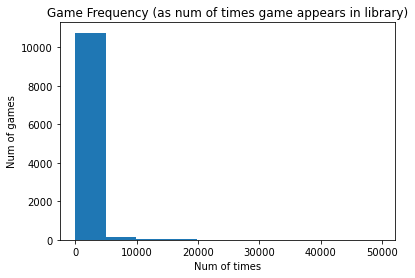

In [24]:
plt.hist(game_freq)
plt.title("Game Frequency (as num of times game appears in library)")
plt.xlabel("Num of times")
plt.ylabel("Num of games")
plt.show()

In [25]:
game_freq_200 = []
for i in game_freq:
    if i <200:
        game_freq_200.append(i)

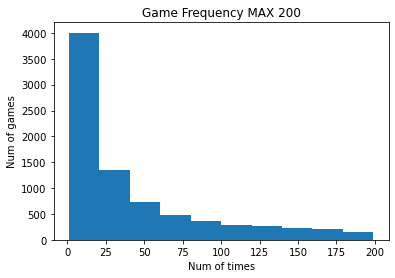

In [26]:
plt.hist(game_freq_200)
plt.title("Game Frequency MAX 200")
plt.xlabel("Num of times")
plt.ylabel("Num of games")
plt.show()

In [27]:
print(len(item_user.keys()))

10978


In [28]:
print(len(user_item.keys()))

70912


## Baseline

In [53]:
t10 = []
g_f = []
for i in item_user.keys():
    g_f.append((i,len(item_user[i])))

In [56]:
g_f.sort(reverse=True,key=lambda x:x[1])

In [64]:
t10 = [i[0] for i in g_f[:10]]
print(t10)

['205790', '730', '4000', '304930', '550', '223530', '105600', '230410', '620', '240']


In [65]:
acc = 0
for i in user_item.keys():
    hit = 0
    for j in t10:
        if j in user_item[i]:
            hit+=1
    if hit>0:
        acc+=1
print(acc/len(user_item.keys()))

0.9557479693140795


## BPR model

In [29]:
from implicit import bpr
import scipy

In [30]:
# create sparse matrix
item_id = {}
item_id_rev = {}
counter = 0
for i in item_user.keys():
    item_id[i]= counter
    item_id_rev[counter]=i
    counter+=1
    
user_id = {}
user_id_rev = {}
counter = 0
for i in user_item.keys():
    user_id[i]=counter
    user_id_rev[counter]=i
    counter+=1
    


In [31]:
import copy

In [32]:
Xiu = scipy.sparse.lil_matrix((len(item_id.keys()), len(user_id.keys())))
Xiu_half = copy.deepcopy(Xiu)

In [33]:
for i in item_user.keys():
    for j in item_user[i]:
        Xiu[item_id[i],user_id[j]]=1
        Xiu_half[item_id[i],user_id[j]] = random.randint(0,1)

Xui = scipy.sparse.csr_matrix(Xiu.T)
Xui_half = scipy.sparse.csr_matrix(Xiu_half.T)

In [34]:
model = bpr.BayesianPersonalizedRanking(factors = 5)

In [35]:
model.fit(Xiu)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
recommended = model.recommend(0, Xui_half)

In [37]:
print(recommended)

[(23, 2.9401407), (24, 2.8141418), (22, 2.7702515), (20, 2.6793156), (128, 2.4450855), (63, 2.4167933), (17, 2.338423), (158, 2.3240814), (64, 2.2619317), (391, 2.201641)]


In [38]:
rec_list = [item_id_rev[i[0]] for i in recommended]

In [39]:
print(rec_list)

['380', '400', '360', '320', '620', '550', '7670', '107100', '223530', '28050']


In [40]:
u_list = user_item[user_id_rev[0]]

In [41]:
hit = 0
for i in rec_list:
    if i in u_list:
        hit+=1
print(hit)

9


In [42]:
# test
acc = 0


In [43]:
for i in user_id.keys():
    recommended = model.recommend(user_id[i], Xui_half)
    rec_list = [item_id_rev[j[0]] for j in recommended]
    u_list = user_item[user_id_rev[user_id[i]]]
    hit = 0
    for k in rec_list:
        if k in u_list:
            hit+=1
    if hit>0:
        acc+=1


In [44]:
print(acc/len(user_id.keys()))

0.8427769629963899


#### Improvement

In [49]:
model = bpr.BayesianPersonalizedRanking(factors = 3, regularization=0.1,iterations=200)

In [50]:
model.fit(Xiu)

  0%|          | 0/200 [00:00<?, ?it/s]

In [51]:
acc = 0
for i in user_id.keys():
    recommended = model.recommend(user_id[i], Xui_half)
    rec_list = [item_id_rev[j[0]] for j in recommended]
    u_list = user_item[user_id_rev[user_id[i]]]
    hit = 0
    for k in rec_list:
        if k in u_list:
            hit+=1
    if hit>0:
        acc+=1
        
print(acc/len(user_id.keys()))

0.8898352888086642


## Linear regressor

In [66]:
#preprocess dataset 2
game_genres = defaultdict(list)


In [72]:
url = steam_games[0]['url']
token = url.split('/')
print(token)

['http:', '', 'store.steampowered.com', 'app', '761140', 'Lost_Summoner_Kitty', '']


In [76]:
for i in steam_games:
    if "url" not in i.keys():
        print("skip")
    else:
        item_id=""
        url = i['url']
        token = url.split('/')
        if len(token)>4:
            item_id=token[4]
        # get genres
        if "genres" in i.keys():
            game_genres[item_id]=i['genres']
        elif "tags" in i.keys():
            game_genres[item_id]=i['tags']
            

In [77]:
print(len(game_genres.keys()))

31994


In [78]:
unique_genres = []
for i in game_genres.keys():
    for j in game_genres[i]:
        if j not in unique_genres:
            unique_genres.append(j)

In [81]:
genre_games = defaultdict(list)
for i in game_genres.keys():
    for j in game_genres[i]:
        genre_games[j].append(i)

In [85]:
genre_freq = {}
for i in genre_games:
    genre_freq[i] = len(genre_games[i])/len(game_genres.keys())

In [87]:
print(genre_freq['Action'])

0.38854160155029066


In [91]:
# use a greedy algorithm to determine recommend items
g_pop = [i[0] for i in g_f]
# create user_item_hidden
user_item_hidden = defaultdict(list)
for i in user_item.keys():
    for j in user_item[i]:
        if random.randint(0,1)==1:
            user_item_hidden[i].append(j)

In [146]:
user_genre_freq = defaultdict(list)
counter_ = 0
acc = 0
for i in user_item_hidden.keys():
    counter_+=1
    if counter_%1000==0:
        print(counter_)
    #i = user_id_rev[0]
    freq = defaultdict(int)
    for j in user_item_hidden[i]:
        if j in game_genres.keys():
            gen = game_genres[j]
            for k in gen:
                freq[k]+=1
    freq_list = []
    s = 0
    for a in freq.keys():
        s+=freq[a]
        freq_list.append((a,freq[a]))
    freq_list.sort(reverse=True,key=lambda x:x[1])
    freq_list = [(i,j/s*10) for (i,j) in freq_list]

    #print(freq_list)
    recommend = []
    if len(freq_list)>0:
        
        for t in range(0,10):

            to_rec = freq_list[0][0]
            in_lib = True
            ptr = 0
            g_list = genre_games[to_rec]
            #print(g_list[:10])
            while(in_lib):
                if ptr>= len(g_list):
                    in_lib = False
                elif (g_pop[ptr] in g_list):
                    if (g_pop[ptr] not in user_item_hidden[i]) and (g_pop[ptr] not in recommend):
                        r = g_pop[ptr]
                        recommend.append(r)

                        in_lib=False
                        genres_of_that_game = game_genres[r]
                        for b in range(0,len(freq_list)):
                            if freq_list[b][0] in genres_of_that_game:
                                freq_list[b] = (freq_list[b][0], freq_list[b][1]-1)
                                freq_list.sort(reverse=True,key=lambda x:x[1])
                    else:
                        ptr+=1
                else:
                    ptr+=1
    else:

        recommend = g_pop[:10]
    #print(recommend)
    #print(freq_list)
    hit = 0
    for c in recommend:
        if c in user_item[i]:
            hit+=1
    if hit>0:
        acc+=1
print(acc/len(user_item_hidden.keys()))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
1.87106904459343


In [148]:
print((acc-0.8898352888086642*len(user_id.keys()))/len(user_item_hidden.keys()))

0.9494033273446971


In [157]:
user_genre_freq = defaultdict(list)
counter_ = 0
acc = 0
for i in user_item_hidden.keys():
    counter_+=1
    if counter_%1000==0:
        print(counter_)
    #i = user_id_rev[0]
    freq = defaultdict(int)
    for j in user_item_hidden[i]:
        if j in game_genres.keys():
            gen = game_genres[j]
            for k in gen:
                if (i,j) in recent_time.keys():
                    freq[k] = 1+freq[k]+(10*recent_time[(i,j)]+time[(i,j)])

                else:
                    freq[k]+=1
    freq_list = []
    s = 0
    for a in freq.keys():
        s+=freq[a]
        freq_list.append((a,freq[a]))
    freq_list.sort(reverse=True,key=lambda x:x[1])
    freq_list = [(i,j/s*10) for (i,j) in freq_list]

    #print(freq_list)
    recommend = []
    if len(freq_list)>0:
        
        for t in range(0,10):

            to_rec = freq_list[0][0]
            in_lib = True
            ptr = 0
            g_list = genre_games[to_rec]
            #print(g_list[:10])
            while(in_lib):
                if ptr>= len(g_list):
                    in_lib = False
                elif (g_pop[ptr] in g_list):
                    if (g_pop[ptr] not in user_item_hidden[i]) and (g_pop[ptr] not in recommend):
                        r = g_pop[ptr]
                        recommend.append(r)

                        in_lib=False
                        genres_of_that_game = game_genres[r]
                        for b in range(0,len(freq_list)):
                            if freq_list[b][0] in genres_of_that_game:
                                freq_list[b] = (freq_list[b][0], freq_list[b][1]-1)
                                freq_list.sort(reverse=True,key=lambda x:x[1])
                    else:
                        ptr+=1
                else:
                    ptr+=1
    else:

        recommend = g_pop[:10]
    #print(recommend)
    #print(freq_list)
    hit = 0
    for c in recommend:
        if c in user_item[i]:
            hit+=1
    if hit>0:
        acc+=1
print(acc/len(user_item_hidden.keys()))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
0.8090209310138323
